In [14]:
# 标准化回归函数和数据导入函数
import numpy as np
import matplotlib as plt 

# def loadDataSet(fileName):
#     numFeat = len(open(fileName).readline().split('\t'))-1
#     dataMat = []
#     labelMat = []
#     fr = open(fileName)
#     for line in fr.readline():
#         lineArr = []
#         curLine = line.strip().split('\t')
#         for i in range(numFeat):
#             lineArr.append(float(curLine[i]))
#         dataMat.append(lineArr)
#         labelMat.append(float(curLine[-1]))
    
#     return dataMat,labelMat
def loadDataSet(filename):
    with open(filename,'r') as fr:
        lines = fr.readlines()
    n = len(lines)
    dataX = np.zeros((n,2))
    dataY = []
    for index,line in enumerate(lines):
        line = line.strip()
        list_of_line = line.split('\t')
        dataX[index,:]=[float(x) for x in list_of_line[:-1]]
        dataY.append(list_of_line[-1])
    return dataX,dataY
dataX,dataY = loadDataSet('ex0.txt')
print(dataX,dataY)

[[1.       0.067732]
 [1.       0.42781 ]
 [1.       0.995731]
 [1.       0.738336]
 [1.       0.981083]
 [1.       0.526171]
 [1.       0.378887]
 [1.       0.033859]
 [1.       0.132791]
 [1.       0.138306]
 [1.       0.247809]
 [1.       0.64827 ]
 [1.       0.731209]
 [1.       0.236833]
 [1.       0.969788]
 [1.       0.607492]
 [1.       0.358622]
 [1.       0.147846]
 [1.       0.63782 ]
 [1.       0.230372]
 [1.       0.070237]
 [1.       0.067154]
 [1.       0.925577]
 [1.       0.717733]
 [1.       0.015371]
 [1.       0.33507 ]
 [1.       0.040486]
 [1.       0.212575]
 [1.       0.617218]
 [1.       0.541196]
 [1.       0.045353]
 [1.       0.126762]
 [1.       0.556486]
 [1.       0.901144]
 [1.       0.958476]
 [1.       0.274561]
 [1.       0.394396]
 [1.       0.87248 ]
 [1.       0.409932]
 [1.       0.908969]
 [1.       0.166819]
 [1.       0.665016]
 [1.       0.263727]
 [1.       0.231214]
 [1.       0.552928]
 [1.       0.047744]
 [1.       0.365746]
 [1.       0.

In [18]:
def stand_regres(dataX,dataY):
    xMat = np.mat(xArr)
    yMat = np.mat(yArr).T
    xTx = xMat.T * xMat
    # 求矩阵的行列式
    if np.linalg.det(xTx) == 0.0:
        print("矩阵为奇异矩阵，不能求逆")
        return
    # .I求逆矩阵
    ws = (xTx.I) * (xMat.T) * yMat
    return ws

In [19]:
import matplotlib.pyplot as plt
def plot_dataset(dataX,dataY,w):
    plt.figure()
    plt.plot(dataX,dataY)
    plt.show()

w = stand_regres(dataX,dataY)
plot_dataset(dataX,dataY,w)

RecursionError: maximum recursion depth exceeded while calling a Python object

[[1.         0.98647356]
 [0.98647356 1.        ]]


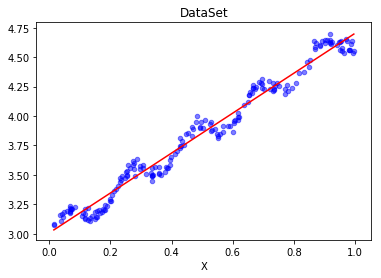

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def loadDataSet(filename):
    # 计算特征个数，由于最后一列为y值所以减一
    numFeat = len(open(filename).readline().split('\t')) - 1
    xArr = []
    yArr = []
    fr = open(filename)
    for line in fr.readlines():
        lineArr = []
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        xArr.append(lineArr)
        yArr.append(float(curLine[-1]))
    return xArr, yArr

def standRegres(xArr, yArr):
    xMat = np.mat(xArr)
    yMat = np.mat(yArr).T
    xTx = xMat.T * xMat
    # 求矩阵的行列式
    if np.linalg.det(xTx) == 0.0:
        print("矩阵为奇异矩阵，不能求逆")
        return
    # .I求逆矩阵
    ws = (xTx.I) * (xMat.T) * yMat
    return ws

def plotDataSet(xArr, yArr,ws):
    # xArr, yArr = loadDataSet('ex0.txt')
    # ws = standRegres(xArr, yArr)
    xMat = np.mat(xArr)
    yMat = np.mat(yArr)
    xCopy = xMat.copy()
    # 排序
    xCopy.sort(0)
    yHat = xCopy * ws
    # 以下两行是通过corrcoef函数比较预测值和真实值的相关性
    # corrcoef函数得到相关系数矩阵
    # 得到的结果中对角线上的数据是1.0，因为yMat和自己的匹配是完美的
    # 而yHat1和yMat的相关系数为0.98
    yHat1 = xMat * ws
    print(np.corrcoef(yHat1.T, yMat))
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(xCopy[:, 1], yHat, c='red')
    # 绘制样本点即
    # flatten返回一个折叠成一维的数组。但是该函数只能适用于numpy对象，即array或者mat，普通的list列表是不行的
    # 矩阵.A(等效于矩阵.getA())变成了数组
    ax.scatter(xMat[:, 1].flatten().A[0], yMat.flatten().A[0], s=20, c='blue', alpha=.5)
    plt.title('DataSet')
    plt.xlabel('X')
    plt.show()
    
if __name__ == '__main__':
    plotDataSet()

## 用梯度下降求w

In [21]:
def desent_regress(dataX,dataY):
    
    dataX = np.mat(dataX)
    dataY = np.mat(dataY).T
    w = np.ones(np.shape(dataX)[1],1))
    alpha = 0.001
    for k in range(500):
        grad = -2*dataX.T * dataY + 2*dataX.T*dataX*w
        w = w-grad
    return w

SyntaxError: invalid syntax (<ipython-input-21-91c75ce414dd>, line 5)

In [23]:
def regularsize(dataX,dataY):
    normal = dataX.copy()
    stu = np.std(dataX[:,1],0)
    normX = (dataX - np.mean(dataX[:,1],0))/std
    return normX

def redge_regress(normX,dataY,law=0.2):
    normX = np.mat(normX)
    dataY = np.mat(dataY).T
    xTx = normX.T * normX
    xTx = xTx*np.eye(np.shape(normX)[1])*law
    if np.linalg.det(xTx)==0:
        print("奇异矩阵，不能求逆矩阵")
        return 0
    w = xTx.T * normal * dataY
    return w

In [ ]:
normX = regularsize(dataX)
w3 = redge_regress(normX,dataY,law=0.2)
print(w3)


In [24]:
import matplotlib.pyplot as plt
import numpy as np

In [25]:
def loadDataSet(fileName):
    # 计算特征数
    numFeat = len(open(fileName).readline().split('\t'))-1
    xArr = []
    yArr = []
    fr = open(filename)
    for line in fr.readlines():
        lineArr = []
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        xArr.append(lineArr)
        yArr.append(float(curLine[-1]))
    return xArr,yArr

In [ ]:
w = ( x.T  * x ) **(-1) *  x.T  *  y

In [27]:
# 计算回归系数w
def standRegres(xArr,yArr):
    xMat = np.mat(xArr)
    yMat = np.mat(yArr)
    xtx = xMat.T*xMat
    # 求矩阵的行列式
    if np.linalg.det(xtx) == 0.0:
        print("矩阵为奇异矩阵，不能求逆矩阵")
        return
    
    # 求w
    ws = (xtx.I)*(x.T)*yMat
    return ws
    

In [ ]:
# 绘制数据集
def plotDataSet(xArr,yArr,w):
    xMat = np.mat(xArr)
    yMat = np.mat(yArr)
    xCopy = xMat.copy()
    
    # 对数据进行排序
    xCopy.sort(0)
    yHat = xCopy * ws
    yHat1 = xMat * ws
    # 打印正确率
    print(np.corrcoef(yHat1.T, yMat))
    # 画图
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(xCopy[:, 1], yHat, c='red')
    
    ax.scatter(xMat[:, 1].flatten().A[0], yMat.flatten().A[0], s=20, c='blue', alpha=.5)
    plt.title('DataSet')
    plt.xlabel('X')
    plt.show()
    
    